In [2]:
# Importing all libraries
import pandas as pd
import numpy as np
import json
import os
import tweepy
import requests
import re
import random
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Gathering Data<h1>

In [3]:
#Import twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# get tweet ids
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [5]:
#load image preditions file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# wb indicates that the file is opened for writing in binary mode
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [201]:
imagePrediction = pd.read_csv('image-predictions.tsv' , sep='\t')
imagePrediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
# My keys are hidden to avoid misusage.
XXX
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Each tweet returnes a json as a new line in a .txt file
with open("tweet_json.txt", "w") as file:
    for i in twitter_archive.tweet_id.values: 
        try: 
            tweet = api.get_status(i, tweet_mode = 'extended') 
            print ("Successful --" + str(i)) 
            json.dump(tweet._json,file) 
            file.write("\n") 
        except: 
            print ("Fail --" + str(i)) 
            pass

with open ("tweet_json.txt") as file:
    list1 = []
    count = 0 
    while True:
        count = count + 1
        text = file.readline()
        if not text:
            break
        text_dict = json.loads(text)
        list1.append(text_dict)

Successful --892420643555336193
Successful --892177421306343426
Successful --891815181378084864
Successful --891689557279858688
Successful --891327558926688256
Successful --891087950875897856
Successful --890971913173991426
Successful --890729181411237888
Successful --890609185150312448
Successful --890240255349198849
Successful --890006608113172480
Successful --889880896479866881
Successful --889665388333682689
Successful --889638837579907072
Successful --889531135344209921
Successful --889278841981685760
Successful --888917238123831296
Successful --888804989199671297
Successful --888554962724278272
Fail --888202515573088257
Successful --888078434458587136
Successful --887705289381826560
Successful --887517139158093824
Successful --887473957103951883
Successful --887343217045368832
Successful --887101392804085760
Successful --886983233522544640
Successful --886736880519319552
Successful --886680336477933568
Successful --886366144734445568
Successful --886267009285017600
Successful --8

Successful --843235543001513987
Fail --842892208864923648
Successful --842846295480000512
Successful --842765311967449089
Successful --842535590457499648
Successful --842163532590374912
Successful --842115215311396866
Successful --841833993020538882
Successful --841680585030541313
Successful --841439858740625411
Successful --841320156043304961
Successful --841314665196081154
Successful --841077006473256960
Successful --840761248237133825
Successful --840728873075638272
Successful --840698636975636481
Successful --840696689258311684
Successful --840632337062862849
Successful --840370681858686976
Successful --840268004936019968
Successful --839990271299457024
Successful --839549326359670784
Successful --839290600511926273
Successful --839239871831150596
Successful --838952994649550848
Successful --838921590096166913
Successful --838916489579200512
Successful --838831947270979586
Successful --838561493054533637
Successful --838476387338051585
Successful --838201503651401729
Successful --8

Successful --810896069567610880
Successful --810657578271330305
Successful --810284430598270976
Successful --810254108431155201
Successful --809920764300447744
Successful --809808892968534016
Successful --809448704142938112
Successful --809220051211603969
Successful --809084759137812480
Successful --808838249661788160
Successful --808733504066486276
Successful --808501579447930884
Successful --808344865868283904
Successful --808134635716833280
Successful --808106460588765185
Successful --808001312164028416
Successful --807621403335917568
Successful --807106840509214720
Successful --807059379405148160
Successful --807010152071229440
Successful --806629075125202948
Successful --806620845233815552
Successful --806576416489959424
Successful --806542213899489280
Successful --806242860592926720
Successful --806219024703037440
Successful --805958939288408065
Successful --805932879469572096
Successful --805826884734976000
Successful --805823200554876929
Successful --805520635690676224
Successf

Successful --776218204058357768
Successful --776201521193218049
Successful --776113305656188928
Successful --776088319444877312
Successful --775898661951791106
Successful --775842724423557120
Successful --775733305207554048
Successful --775729183532220416
Successful --775364825476165632
Successful --775350846108426240
Fail --775096608509886464
Successful --775085132600442880
Successful --774757898236878852
Successful --774639387460112384
Successful --774314403806253056
Successful --773985732834758656
Successful --773922284943896577
Successful --773704687002451968
Successful --773670353721753600
Successful --773547596996571136
Successful --773336787167145985
Successful --773308824254029826
Successful --773247561583001600
Successful --773191612633579521
Successful --772877495989305348
Successful --772826264096874500
Successful --772615324260794368
Successful --772581559778025472
Successful --772193107915964416
Successful --772152991789019136
Successful --772117678702071809
Successful --7

Rate limit reached. Sleeping for: 561


Successful --758740312047005698
Successful --758474966123810816
Successful --758467244762497024
Successful --758405701903519748
Successful --758355060040593408
Successful --758099635764359168
Successful --758041019896193024
Successful --757741869644341248
Successful --757729163776290825
Successful --757725642876129280
Successful --757611664640446465
Successful --757597904299253760
Successful --757596066325864448
Successful --757400162377592832
Successful --757393109802180609
Successful --757354760399941633
Successful --756998049151549440
Successful --756939218950160384
Successful --756651752796094464
Successful --756526248105566208
Successful --756303284449767430
Successful --756288534030475264
Successful --756275833623502848
Successful --755955933503782912
Successful --755206590534418437
Successful --755110668769038337
Successful --754874841593970688
Successful --754856583969079297
Successful --754747087846248448
Successful --754482103782404096
Successful --754449512966619136
Successf

Successful --724405726123311104
Successful --724049859469295616
Successful --724046343203856385
Successful --724004602748780546
Successful --723912936180330496
Successful --723688335806480385
Successful --723673163800948736
Successful --723179728551723008
Successful --722974582966214656
Successful --722613351520608256
Successful --721503162398597120
Successful --721001180231503872
Successful --720785406564900865
Successful --720775346191278080
Successful --720415127506415616
Successful --720389942216527872
Successful --720340705894408192
Successful --720059472081784833
Successful --720043174954147842
Successful --719991154352222208
Successful --719704490224398336
Successful --719551379208073216
Successful --719367763014393856
Successful --719339463458033665
Successful --719332531645071360
Successful --718971898235854848
Successful --718939241951195136
Successful --718631497683582976
Successful --718613305783398402
Successful --718540630683709445
Successful --718460005985447936
Successf

Successful --698710712454139905
Successful --698703483621523456
Successful --698635131305795584
Successful --698549713696649216
Successful --698355670425473025
Successful --698342080612007937
Successful --698262614669991936
Successful --698195409219559425
Successful --698178924120031232
Successful --697995514407682048
Successful --697990423684476929
Successful --697943111201378304
Successful --697881462549430272
Successful --697630435728322560
Successful --697616773278015490
Successful --697596423848730625
Successful --697575480820686848
Successful --697516214579523584
Successful --697482927769255936
Successful --697463031882764288
Successful --697270446429966336
Successful --697259378236399616
Successful --697255105972801536
Successful --697242256848379904
Successful --696900204696625153
Successful --696894894812565505
Successful --696886256886657024
Successful --696877980375769088
Successful --696754882863349760
Successful --696744641916489729
Successful --696713835009417216
Successf

Successful --682393905736888321
Successful --682389078323662849
Successful --682303737705140231
Successful --682259524040966145
Successful --682242692827447297
Successful --682088079302213632
Successful --682059653698686977
Successful --682047327939461121
Successful --682032003584274432
Successful --682003177596559360
Successful --681981167097122816
Successful --681891461017812993
Successful --681694085539872773
Successful --681679526984871937
Successful --681654059175129088
Successful --681610798867845120
Successful --681579835668455424
Successful --681523177663676416
Successful --681340665377193984
Successful --681339448655802368
Successful --681320187870711809
Successful --681302363064414209
Successful --681297372102656000
Successful --681281657291280384
Successful --681261549936340994
Successful --681242418453299201
Successful --681231109724700672
Successful --681193455364796417
Successful --680970795137544192
Successful --680959110691590145
Successful --680940246314430465
Successf

Rate limit reached. Sleeping for: 580


Successful --676975532580409345
Successful --676957860086095872
Successful --676949632774234114
Successful --676948236477857792
Successful --676946864479084545
Successful --676942428000112642
Successful --676936541936185344
Successful --676916996760600576
Successful --676897532954456065
Successful --676864501615042560
Successful --676821958043033607
Successful --676819651066732545
Successful --676811746707918848
Successful --676776431406465024
Successful --676617503762681856
Successful --676613908052996102
Successful --676606785097199616
Successful --676603393314578432
Successful --676593408224403456
Successful --676590572941893632
Successful --676588346097852417
Successful --676582956622721024
Successful --676575501977128964
Successful --676533798876651520
Successful --676496375194980353
Successful --676470639084101634
Successful --676440007570247681
Successful --676430933382295552
Successful --676263575653122048
Successful --676237365392908289
Successful --676219687039057920
Successf

Successful --671355857343524864
Successful --671347597085433856
Successful --671186162933985280
Successful --671182547775299584
Successful --671166507850801152
Successful --671163268581498880
Successful --671159727754231808
Successful --671154572044468225
Successful --671151324042559489
Successful --671147085991960577
Successful --671141549288370177
Successful --671138694582165504
Successful --671134062904504320
Successful --671122204919246848
Successful --671115716440031232
Successful --671109016219725825
Successful --670995969505435648
Successful --670842764863651840
Successful --670840546554966016
Successful --670838202509447168
Successful --670833812859932673
Successful --670832455012716544
Successful --670826280409919488
Successful --670823764196741120
Successful --670822709593571328
Successful --670815497391357952
Successful --670811965569282048
Successful --670807719151067136
Successful --670804601705242624
Successful --670803562457407488
Successful --670797304698376195
Successf

Successful --666701168228331520
Successful --666691418707132416
Successful --666649482315059201
Successful --666644823164719104
Successful --666454714377183233
Successful --666447344410484738
Successful --666437273139982337
Successful --666435652385423360
Successful --666430724426358785
Successful --666428276349472768
Successful --666421158376562688
Successful --666418789513326592
Successful --666411507551481857
Successful --666407126856765440
Successful --666396247373291520
Successful --666373753744588802
Successful --666362758909284353
Successful --666353288456101888
Successful --666345417576210432
Successful --666337882303524864
Successful --666293911632134144
Successful --666287406224695296
Successful --666273097616637952
Successful --666268910803644416
Successful --666104133288665088
Successful --666102155909144576
Successful --666099513787052032
Successful --666094000022159362
Successful --666082916733198337
Successful --666073100786774016
Successful --666071193221509120
Successf

In [202]:
#save as json_df
json_df = pd.DataFrame(list1)

In [203]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


<h1>Assessing Data<h1>

In [204]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [205]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [206]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [207]:
twitter_archive.duplicated().sum()

0

In [208]:
json_df

""


Quality Issues:
***
- The timestamp column format is wrong
- There are some invalid names 
- The source column is enclosed in html tags
- we should not assess retweets and reply related column
- The expanded urls column has missing values
- The missing dog stages should be represented as Null Values instead of "None"
- The Rating Denominator should be 10 for consistency
- some of the predictions were not classified as dogs.

Tidiness Issues
***
- The retweeted and favorite columns should be added to the dataset
- Puppo, Puppper, Doggo, Flopper should be in one column: stage


<h1>Cleaning<h1>

In [209]:
twitter_archive_copy = twitter_archive.copy()

- Define: Extract Year, Month Day from Time Stamp and Convert it to Datetime from Object
- Code: The extraction can be done using regular expressions and conversion using python datetime method.
- Test: Upon cleansing, the first few rows of the column is checked.

In [210]:
# Here we correct the timestamp format using regex
timestamp = []
for i in twitter_archive_copy['timestamp']:
    x = re.findall(r"\d{4}-\d{2}-\d{1,2}", i)
    for time in x:
        timestamp.append(time)

twitter_archive_copy['timestamp'] = timestamp
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy['timestamp'].head()


0   2017-08-01
1   2017-08-01
2   2017-07-31
3   2017-07-30
4   2017-07-29
Name: timestamp, dtype: datetime64[ns]

In [211]:
twitter_archive_copy['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- Define: The 'A' and 'None' names should be converted to N/A
- Code: The column is explored and then replaced from None, A to N/A
- Test: The unique values are explored to see if changes are made

In [212]:
#There are some incorrect names, we need to clean that up
twitter_archive_copy['name'].replace({'None':np.nan,'a':np.nan}, inplace=True)

In [213]:
twitter_archive_copy.name.isnull().sum()

800

In [214]:
twitter_archive_copy.source[2]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

- Define: The source of the tweet is enclosed with html tags
- Code: String Operations are done to extract the text
- Test: The first few rows of the edited data is checked

In [215]:
# As we can see above the source in enclosed in html tags. we need to cutout the source name.
source_edited = []
for i in twitter_archive_copy.source:
    j = i.split(">")[1]
    j = j.replace("</a", "")
    source_edited.append(j)

In [216]:
twitter_archive_copy['source'] = source_edited
twitter_archive_copy.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [217]:
twitter_archive_copy['in_reply_to_user_id'].notna().sum()

78

In [218]:
twitter_archive_copy['retweeted_status_user_id'].notna().sum()

181

- Define: Remove the rows containing retweets or replies from the archive dataset
- Code: Removal can be done using the drop and notna methods
- Test: The size of the dataframe is checked

In [219]:
#As we delete the notna() values we get a slightly smaller dataframe
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['in_reply_to_user_id'].isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_user_id'].isnull()]
twitter_archive_copy.shape

(2097, 17)

In [220]:
# like mentioned in the task description these coloumns are not needed.
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                          'retweeted_status_timestamp'], axis=1)

In [221]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [222]:
twitter_archive_copy.expanded_urls[2]

'https://twitter.com/dog_rates/status/891815181378084864/photo/1'

In [223]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                1439 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 277.5+ KB


- Define: The missing values in the expanded urls column should be removed
- Code: The dropna method is used to remove the missing values
- Test: The isnull() method is used to check if there are missing values in the column

In [224]:
#The missing values in the expanded urls column should be removed
twitter_archive_copy = twitter_archive_copy.dropna(subset=['expanded_urls'], how='all', axis=0)
twitter_archive_copy['expanded_urls'].isnull().sum()

0

In [225]:
#We need to combine the dog stages in one column
def dog_stage (df, col):
    return df[col].replace("None",'')

twitter_archive_copy['doggo'] = dog_stage(twitter_archive_copy,'doggo')
twitter_archive_copy['floofer'] = dog_stage(twitter_archive_copy,'floofer')
twitter_archive_copy['pupper'] = dog_stage(twitter_archive_copy,'pupper')
twitter_archive_copy['puppo'] = dog_stage(twitter_archive_copy,'puppo')

In [226]:
twitter_archive_copy.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           0
rating_numerator        0
rating_denominator      0
name                  655
doggo                   0
floofer                 0
pupper                  0
puppo                   0
dtype: int64

In [227]:
l=twitter_archive_copy['doggo'] + twitter_archive_copy['floofer'] + twitter_archive_copy['pupper'] + twitter_archive_copy['puppo']
l = l.replace(['doggopupper','doggopuppo','doggofloofer'],'doggo')
l=l.replace({'',np.nan})
twitter_archive_copy['stage'] = l
twitter_archive_copy = twitter_archive_copy.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [228]:
twitter_archive_copy.stage.head()

0    
1    
2    
3    
4    
Name: stage, dtype: object

In [ ]:
#we need to add the favorite and retweeted columns to the final dataset
json_df_copy = json_df[['id','favorite_count','retweet_count']]
json_df_copy.head()

In [163]:
#favorite and retweet are combined into on twitter_archive_copy = twitter_archive_copy.merge(json_df_copy, right_on='id',left_on='tweet_id')
twitter_archive_copy = twitter_archive_copy.merge(json_df_copy, right_on='id',left_on='tweet_id')
twitter_archive_copy = twitter_archive_copy.drop(['id'], axis = 1)
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33809,7009
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29331,5301
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,22050,3481
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,36937,7225
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,35311,7760


- Define: The breedPredict is created to contain the predictions of dog breeds in the imagePrediction Data. Since some dog breed predictions are not correct, p1, p2 and p3 are checked for a better prediction.

- Code: By applying conditional statements in the imagePrediction dataframe, the correct dog predictions are selected and a missing value(nan) returned when none of the predictions are classified as dogs.

- Test: The first five rows of the breedPredict series is explored.

In [122]:
#Some of the dog predictions are not correct. Therefore we need to check the alternatives p1,p2 and p3 for a better prediction.
imagePrediction['breedPredict'] = imagePrediction['p1']
imagePrediction.breedPredict[imagePrediction['p1_dog'] != True] = imagePrediction['p2']
imagePrediction.breedPredict[(imagePrediction['p1_dog'] != True) & (imagePrediction['p2_dog'] != True)] = imagePrediction['p3']
imagePrediction.breedPredict[(imagePrediction['p1_dog'] != True) & (imagePrediction['p2_dog'] != True) & (imagePrediction['p3_dog'] != True)] = np.nan

In [123]:
imagePrediction.breedPredict.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: breedPredict, dtype: object

In [124]:
imagePrediction_copy = imagePrediction[['tweet_id','breedPredict']]

- Define: The predicted breeds of the dogs should be added to the dataset
- Code: The breeds are added to the tweitter_archive_copy using pandas merge function on tweet id
- Test: The first five rows of the dataset is explored to see if changes have been effected.

In [126]:
#Last but not least we add the predicted breeds to our dataset
twitter_archive_copy = twitter_archive_copy.merge(imagePrediction_copy, right_on='tweet_id',left_on='tweet_id')
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,breedPredict_x,breedPredict_y
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,33809,7009,NaN,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,29331,5301,Chihuahua,Chihuahua
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,22050,3481,Chihuahua,Chihuahua
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,36937,7225,Labrador_retriever,Labrador_retriever
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,35311,7760,basset,basset


In [127]:
twitter_archive_copy.to_csv("twitter_archive_master.csv", index=False)

In [128]:
wrangled_data = pd.read_csv("twitter_archive_master.csv")

<h1>Analysis and Visualization<h1>

In [129]:
wrangled_data.shape

(1963, 13)

In [130]:
wrangled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1963 non-null   int64 
 1   timestamp           1963 non-null   object
 2   source              1963 non-null   object
 3   text                1963 non-null   object
 4   expanded_urls       1963 non-null   object
 5   rating_numerator    1963 non-null   int64 
 6   rating_denominator  1963 non-null   int64 
 7   name                1385 non-null   object
 8   stage               302 non-null    object
 9   favorite_count      1963 non-null   int64 
 10  retweet_count       1963 non-null   int64 
 11  breedPredict_x      1658 non-null   object
 12  breedPredict_y      1658 non-null   object
dtypes: int64(5), object(8)
memory usage: 199.5+ KB


In [131]:
wrangled_data.timestamp = pd.to_datetime(wrangled_data.timestamp)

In [132]:
wrangled_data.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                   578
stage                 1661
favorite_count           0
retweet_count            0
breedPredict_x         305
breedPredict_y         305
dtype: int64

In [134]:
wrangled_data.source.value_counts()

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [ ]:
wrangled_data.source.value_counts([0])

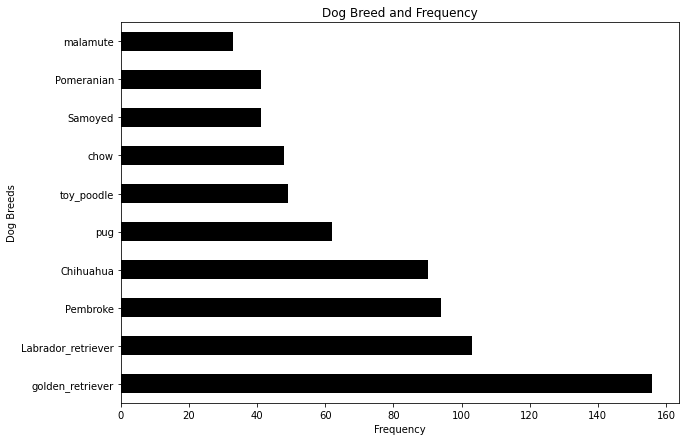

In [139]:
fig = plt.figure(figsize =(10, 7))

wrangled_data['breedPredict_x'].value_counts().nlargest(10).plot.barh(color = 'black')
plt.ylabel("Dog Breeds")
plt.xlabel("Frequency")
plt.title("Dog Breed and Frequency");

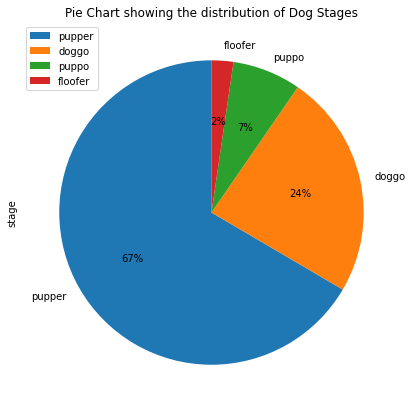

In [140]:
fig = plt.figure(figsize =(10, 7))

wrangled_data.stage.value_counts().plot.pie(autopct='%.f%%', startangle=90)
plt.title("Dog Stages Distribution")
plt.legend();

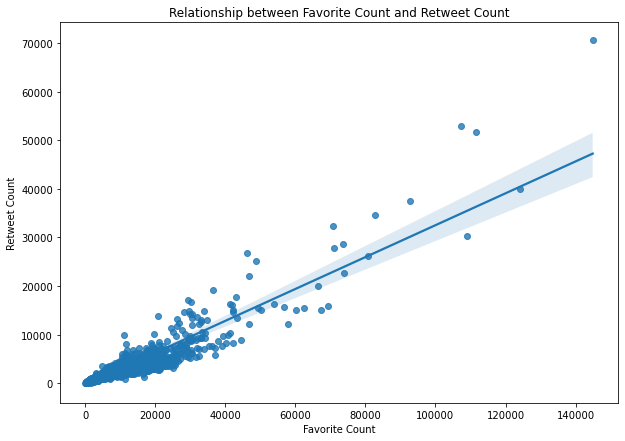

In [142]:
favorite_retweet = wrangled_data[['favorite_count','retweet_count']]
fig = plt.figure(figsize =(10, 7))
sns.regplot(favorite_retweet['favorite_count'], favorite_retweet['retweet_count'])
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")
plt.title("Relationship between Retweet Count and Favorite Count");